**PRACTICE EXERCISE 1**


**1. PROBLEM**

Predicting the progression of diabetes through physiological indicators of the body

**Dataset information:**
- Number of examples: 442 (information of 442 patients)
- Number of features: 10 (Age, Sex, BMI, Average Blood Pressure, S1, S2, S3, S4, S5, S6 (six other serum measurements))
- Target: column 11 - evaluate health progression after 1 year of treatment.

**NOTE**: All data have been normalized before

**2. SOLUTION**

**Using regression model**

2.1. Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

2.2. Read data

The received data is in the form of an object with the following attributes:
- Data: 2-dimensional matrix (442x10) - Patient information is normalized to real numbers
- Target: array of real numbers (442,) - Health progression index

In [2]:
# load data of diabetes dataset
diabetes = datasets.load_diabetes()
# data exploration
print("Số chiều dữ liệu input:\n", diabetes.data.shape)
print("Kiểu dữ liệu input:\n", type(datasets.data))
print("Số chiều dữ liệu target:\n", diabetes.target.shape)
print("Kiểu dữ liệu target:\n", type(diabetes.target))

print("5 mẫu dữ liệu đầu tiên:")
print("Input:\n", diabetes.data[:5])
print("Output:\n", diabetes.target[:5])

Số chiều dữ liệu input:
 (442, 10)
Kiểu dữ liệu input:
 <class 'module'>
Số chiều dữ liệu target:
 (442,)
Kiểu dữ liệu target:
 <class 'numpy.ndarray'>
5 mẫu dữ liệu đầu tiên:
Input:
 [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
Output:
 [151.  75. 141. 206. 135.]


Separate data into training set and test set

In [3]:
# training: 362 examples
# test: 80 examples
X = diabetes.data
y = diabetes.target
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

Xtrain = X[:362]
ytrain = y[:362]

Xtest = X[362:]
ytest = y[362:]

Build regression model using sklearn

In [4]:
# setting model with alpha=0.1
regr = linear_model.Ridge(alpha=0.1)

2.3. Training model

In [5]:
regr.fit(Xtrain, ytrain)
print("Tham số mô hình tìm được:")
w = regr.coef_
b = regr.intercept_
print(w)
print(b)

# predict result by model
y_pred = regr.predict(Xtest)

Tham số mô hình tìm được:
[  -1.6266335  -223.70231255  529.5367731   262.62304884  -62.86661336
  -51.53572137 -181.06205021  178.75954262  366.1463815   106.26963151]
153.54658665790166


Predict for the first observation

In [6]:
y_pred_first = np.dot(w, Xtest[0]) + b
print("Giá trị dự đoán cho trường hợp đầu tiên:")
print(y_pred_first)
print("Giá trị thư viện cho trường hợp đầu tiên:")
print(ytest[0])
# predict the first observation using model's prediction function
print("Giá trị dự đoán của model cho trường hợp đầu tiên:")
print(y_pred[0])

Giá trị dự đoán cho trường hợp đầu tiên:
117.93063011041755
Giá trị thư viện cho trường hợp đầu tiên:
53.0
Giá trị dự đoán của model cho trường hợp đầu tiên:
117.93063011041754


2.4. Evaluate model

In [7]:
# save results
compare_data = pd.DataFrame(data=np.array([
    ytest, y_pred, abs(y_pred - ytest)
]).T, columns=["Thực tế", "Dự đoán", "Lệch"])
compare_data

,Thực tế,Dự đoán,Lệch
0,53.0,117.930630,64.930630
1,310.0,257.458482,52.541518
2,195.0,223.902128,28.902128
3,84.0,198.294349,114.294349
4,131.0,174.590976,43.590976
...,...,...,...
75,137.0,91.825023,45.174977
76,245.0,268.944328,23.944328
77,178.0,119.164677,58.835323
78,190.0,134.024992,55.975008


Evaluate model with lambda=0.1

In [8]:
model_error_first = math.sqrt(mean_squared_error(y_true=ytest, y_pred=y_pred))
model_error_first

57.519434868879344

Evaluate multiple model with different lambda

In [9]:
_lambda = [0, 0.0001, 0.01, 0.04, 0.05, 0.06, 0.1, 0.5, 1, 5, 10, 20]
model_list = []
error = []

for alpha in _lambda:
    model = linear_model.Ridge(alpha)
    model_list.append(model)
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    model_error = math.sqrt(mean_squared_error(y_true=ytest, y_pred=y_pred))
    error.append(model_error)

In [10]:
for i in range(len(error)):
    print(f"Đánh giá loss của mô hình sử dụng lambda = {_lambda[i]}")
    print(error[i])

Đánh giá loss của mô hình sử dụng lambda = 0
57.571686427199715
Đánh giá loss của mô hình sử dụng lambda = 0.0001
57.56360233923305
Đánh giá loss của mô hình sử dụng lambda = 0.01
57.45518866058772
Đánh giá loss của mô hình sử dụng lambda = 0.04
57.4782369050791
Đánh giá loss của mô hình sử dụng lambda = 0.05
57.481729913384584
Đánh giá loss của mô hình sử dụng lambda = 0.06
57.48624839253915
Đánh giá loss của mô hình sử dụng lambda = 0.1
57.519434868879344
Đánh giá loss của mô hình sử dụng lambda = 0.5
58.51054420734437
Đánh giá loss của mô hình sử dụng lambda = 1
59.94728653323853
Đánh giá loss của mô hình sử dụng lambda = 5
66.54011287092663
Đánh giá loss của mô hình sử dụng lambda = 10
69.83703413949866
Đánh giá loss của mô hình sử dụng lambda = 20
72.41139466808288


Choose the best model

In [11]:
final_model = model_list[np.argmin(error)]
final_lamba = _lambda[np.argmin(error)]
print()
print("Giá trị lamba tốt nhất: lambda = ", final_lamba)
# prediction of the best model
y_pred_final = final_model.predict(Xtest)


Giá trị lamba tốt nhất: lambda =  0.01


2.5. Plot the distribution chart for the result predicted by the linear regression model

In [12]:
import seaborn as sns

# examine data
df_pred = pd.DataFrame({'Predicted': y_pred_final})
print(df_pred)
print()
print(df_pred.describe())

     Predicted
0   114.728909
1   259.669675
2   230.337315
3   196.417306
4   171.156493
..         ...
75   91.031741
76  264.306629
77  117.336781
78  137.800616
79  235.736073

[80 rows x 1 columns]

        Predicted
count   80.000000
mean   151.035137
std     54.292959
min     52.193878
25%    105.870736
50%    146.821890
75%    191.571103
max    264.306629


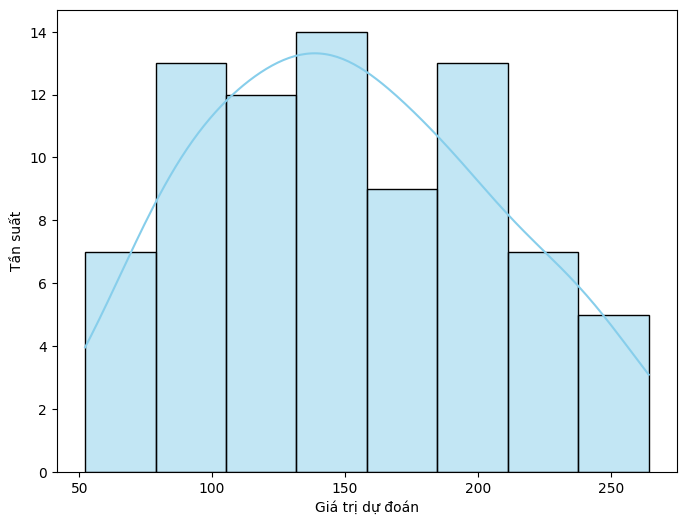

In [17]:
plt.figure(figsize=(8, 6))
# kde=True means show additional “density estimate” curve on the histogram
sns.histplot(df_pred['Predicted'], kde=True, color='skyblue')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Tần suất')
plt.savefig('density_prediction.png')